<a href="https://colab.research.google.com/github/Sergius-DS/Proyecto_Final_CoderHouse/blob/main/Proyecto_Final_Classification_Sergio_Rivera.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **OBJETIVO**

Se busca utilizando la Ciencia de Datos, identificar características que influyan en la deserción de clientes(Churning), así también con los datos obtenidos ver si se puede obtener revelaciones de cómo optimizar el servicio existente.

**CONTEXTO**

En un mundo cada vez más demandante y con muchas opciones, la deserción de clientes es más común ya sea por factores económicos, mal servicio, falta de educación financiera, desconocimiento de todos los servicios a los que se puede optar o falta de interacción cliente-compañía, podrían ser causantes de la deserción.

Se va a buscar revelaciones que puedan confirmar a través de los datos qué características influyen en esta acción.

**DATOS GENERALES**

El dataset proporcionado '**Credit_card_churn.xlsx**' obtenido de "Kaggle" cuenta con 10.127 filas y 23 columnas lo que propociona una buena cantidad datos para hacer un análisis.

El set de datos brinda información relacionada a la deserción de clientes, como edad de los clientes ya sean existentes o que abandonaron, límite de crédito, saldo final, tipo de educación, si han sido contactados en los últimos 12 meses, etc.

Se va a explorar el set de datos, se van a hacer análisis, plantear preguntas relacionadas al objetivo y obteniendo respuestas de los datos presentes en el data set para hacer frente a la deserción de clientes.


**ESTRUCTURA DEL SET DE DATOS**

 **CLIENTNUM:** es un identicador único del tipo numérico.

 **Attrition_Flag:** es del tipo string que consta de 2 categorías ['Existing Customer' 'Attrited Customer'] ['Cliente Existente' 'Cliente Desertado']

 **Customer_Age:** La edad de los clientes es del tipo numérico.

 **Gender:** es del tipo string que consta de 2 categorías ['M' 'F'] para Masculino y Femenino

 **Dependent_count:** es del tipo numérico y muestra la cantidad de personas que dependen del cliente, hijos, familiares.

 **Education_Level:** es del tipo string que consta de ['High School':Liceo, 'Graduate':Graduado, 'Uneducated':Sin Educación, 'Unknown': Desconocido, 'College':Universidad, 'Post-Graduate':Magister,
 'Doctorate':Doctorado] mostrando los niveles de educación de los clientes

 **Marital_Status:** es del tipo string que consta de ['Married' 'Single' 'Unknown' 'Divorced'] ['Casado/a' 'Soltero/a' 'Desconocido' 'Divorciado/a']

 **Income_Category:** es del tipo string que consta de ['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown'] rangos de sueldo y una categoría Desconocido

 **Card_Category:** es del tipo string que consta de categorías de tarjetas de Crédito['Blue' 'Gold' 'Silver' 'Platinum']

 **Months_on_book:** es del tipo numérico y refleja la cantidad de meses que el cliente lleva en la compañía

 **Total_Relationship_Count:** es del tipo numérico y refleja la cantidad de servicios el cliente tiene con la compañía

 **Months_Inactive_12_mon:** es del tipo numérico y refleja la cantidad de meses que el cliente ha estado inactivo durante los últimos 12 meses

 **Contacts_Count_12_mon:** es del tipo numérico y refleja la cantidad de clientes o instituciones con los que el cliente tuvo contacto dentro de los últimos 12 meses

 **Credit_Limit:** es del tipo flotante y muestra el Límite de Crédito del cliente

 **Total_Revolving_Bal:** es del tipo numérico y muestra la cantidad de dinero que el cliente debe a la compañía

 **Avg_Open_To_Buy:** es del tipo flotante y muestra la cantidad de dinero que el cliente tiene disponible para hacer compras

 **Total_Amt_Chng_Q4_Q1:** muestra el cambio de la cantidad del cuarto al primer trimestre **falta limpiar esa columna**. ver eso está como object

 **Total_Trans_Amt:** es del tipo numérico y refleja el dinero total en las transacciones realizadas

 **Total_Trans_Ct:** es del tipo numérico y refleja la cantidad de dinero que aumentó debido a las transacciones realizadas

 **Total_Ct_Chng_Q4_Q1:** es del tipo numérico y refleja la cantidad de transacciones que aumentaron desde el primer al cuarto trimestre

 **Avg_Utilization_Ratio:** es del tipo flotante y muestra la razón el porcentaje de cuánto un cliente utilizó los servicios ofrecidos

   **Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1:** es del tipo flotante, se observa que se usó el Clasificador Naives Bayes, pero no se sabe cómo fue usado en qué variables, si se hizo Data Wrangling, si se normalizaron los datos. En general no se sabe si la metodología está bien aplicada

   **Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2:** es del tipo flotante,  se observa que se usó el Clasificador Naives Bayes, pero no se sabe cómo fue usado en qué variables, si se hizo Data Wrangling, si se normalizaron los datos. En general no se sabe si la metodología está bien aplicada


#**ANALISIS EXPLORATORIO DE DATOS** **(E.D.A)**

IMPORTACIÓN DE LIBRERÍAS

In [1]:
# Maninpulación de Datos y Análisis
import pandas as pd
import numpy as np

# Visualización de Datos
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots


# Aprendizaje de Máquina (Machine Learning)
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, StratifiedKFold
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report


# Varios
!pip install prettytable
from prettytable import PrettyTable

DATASET (SET DE DATOS)

In [2]:
# Leer el archivo con Pandas
df = pd.read_excel('Credit_card_churn.xlsx')
print(df.head())

   CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0              39  ...       12691.0                  777          11914.0   
1       

In [3]:
# Imprimir la forma de "df"
print(df.shape)

(10127, 23)


In [4]:
def df_explore(df):
    #Tabla de Descripción de las características principales de cada columna en el data set
    print( 'Shape: ', df.shape)

    t = PrettyTable(['Column',
                     'Type',
                     'Non-Null',
                     'Nulls',
                     'Unique',
                     'Example',
                    ])

    for c in df.columns:
        t.add_row([c,
                   df[c].dtype,
                   len(df[c])-np.sum(df[c].isna()),
                   np.sum(df[c].isna()),
                   np.count_nonzero(df[c].unique()),
                   df[~df[c].isnull()][c].iloc[0],
                  ])
    print(t)
    print()
    return

df_explore(df)

Shape:  (10127, 23)
+------------------------------------------------------------------------------------------------------------------------------------+---------+----------+-------+--------+-------------------+
|                                                               Column                                                               |   Type  | Non-Null | Nulls | Unique |      Example      |
+------------------------------------------------------------------------------------------------------------------------------------+---------+----------+-------+--------+-------------------+
|                                                             CLIENTNUM                                                              |  int64  |  10127   |   0   | 10127  |     768805383     |
|                                                           Attrition_Flag                                                           |  object |  10127   |   0   |   2    | Existing Customer |
|              

In [5]:
#Descripción stadística de las variables numéricas
print(df.describe().round(2).T)

                                                      count          mean  \
CLIENTNUM                                           10127.0  7.391776e+08   
Customer_Age                                        10127.0  4.633000e+01   
Dependent_count                                     10127.0  2.350000e+00   
Months_on_book                                      10127.0  3.593000e+01   
Total_Relationship_Count                            10127.0  3.810000e+00   
Months_Inactive_12_mon                              10127.0  2.340000e+00   
Contacts_Count_12_mon                               10127.0  2.460000e+00   
Credit_Limit                                        10127.0  8.631950e+03   
Total_Revolving_Bal                                 10127.0  1.162810e+03   
Avg_Open_To_Buy                                     10127.0  7.469140e+03   
Total_Trans_Amt                                     10127.0  4.404090e+03   
Total_Trans_Ct                                      10127.0  6.486000e+01   

In [6]:
# Descripción stadística de las variables categóricas
print(df.describe(exclude='number').T)

                      count unique                top  freq
Attrition_Flag        10127      2  Existing Customer  8500
Gender                10127      2                  F  5358
Education_Level       10127      7           Graduate  3128
Marital_Status        10127      4            Married  4687
Income_Category       10127      6     Less than $40K  3561
Card_Category         10127      4               Blue  9436
Total_Amt_Chng_Q4_Q1  10127   1154                791    36
Total_Ct_Chng_Q4_Q1   10127    825                667   171


In [7]:
# Identificar valores Nulos en las columnas
print(df.isnull().sum())

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

VALORES DUPLICADOS

In [8]:
# Comprobación de valores duplicados
print(df.duplicated().sum())

0


COLUMNAS CATEGÓRICAS

In [9]:
# Identificar características categóricas
print(df.columns[df.dtypes == 'object'])

Index(['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Total_Amt_Chng_Q4_Q1',
       'Total_Ct_Chng_Q4_Q1'],
      dtype='object')


COLUMNAS NUMÉRICAS

In [10]:
# Identificar características numéricas
print(df.columns[df.dtypes != 'object'])

Index(['CLIENTNUM', 'Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Trans_Amt', 'Total_Trans_Ct',
       'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')


In [11]:
# Contar el número de ocurrencias de los valores dentro de Attrition_Flag
print(df['Attrition_Flag'].value_counts())

Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64


In [12]:
# Contar el número de ocurrencias de los valores dentro de Gender
print(df['Gender'].value_counts())

Gender
F    5358
M    4769
Name: count, dtype: int64


In [13]:
# Contar el número de ocurrencias de los valores dentro de Education_Level
print(df['Education_Level'].value_counts())

Education_Level
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: count, dtype: int64


In [14]:
# Contar el número de ocurrencias de los valores dentro de Marital Status
print(df['Marital_Status'].value_counts())

Marital_Status
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: count, dtype: int64


In [15]:
# Contar el número de ocurrencias de los valores dentro de Income Category
print(df['Income_Category'].value_counts())

Income_Category
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: count, dtype: int64


In [16]:
# Contar el número de ocurrencias de los valores dentro de Card Category
print(df['Card_Category'].value_counts())

Card_Category
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: count, dtype: int64


In [17]:
# Verificar que todos los valores dentro de la columna son del tipo Object
assert df['Total_Amt_Chng_Q4_Q1'].dtype == 'object'

CORRECIÓN DE CATEGORÍA TOTAL_AMT_CHNG_Q4_Q1

In [18]:
# Crear un DataFrame alternativo para identificar valores que no corresponden
data = df['Total_Amt_Chng_Q4_Q1']
dffecha = pd.DataFrame(data)

# Iterar a través de filas y encontrar el índice de filas del tipo datetime
for index, row in dffecha.iterrows():
    if isinstance(row['Total_Amt_Chng_Q4_Q1'], pd.Timestamp):
        dffecha.loc[index, 'Total_Amt_Chng_Q4_Q1'] = np.nan
        #print(f"Row with index {index} is of datetime type.")

In [19]:
# Verificar Nulos en dffecha
print(dffecha.isna().sum())

Total_Amt_Chng_Q4_Q1    57
dtype: int64


In [20]:
# Imputar valores Nulos con la Media y asignarlo al Dataframe de interés
dffecha['Total_Amt_Chng_Q4_Q1'] = pd.to_numeric(dffecha['Total_Amt_Chng_Q4_Q1'])
dffecha['Total_Amt_Chng_Q4_Q1'].fillna(value=dffecha['Total_Amt_Chng_Q4_Q1'].mean(), inplace=True)
df['Total_Amt_Chng_Q4_Q1'] = dffecha['Total_Amt_Chng_Q4_Q1']

In [21]:
# Verificar que no hay valores Nulos
print(df['Total_Amt_Chng_Q4_Q1'].info())

<class 'pandas.core.series.Series'>
RangeIndex: 10127 entries, 0 to 10126
Series name: Total_Amt_Chng_Q4_Q1
Non-Null Count  Dtype  
--------------  -----  
10127 non-null  float64
dtypes: float64(1)
memory usage: 79.2 KB
None


CORRECIÓN DE CATEGORÍA TOTAL_CT_CHNG_Q4_Q1

In [22]:
# Crear un DataFrame alternativo para identificar valores que no corresponden
data2 = df['Total_Ct_Chng_Q4_Q1']
dffecha2 = pd.DataFrame(data2)

# Iterar a través de filas y encontrar el índice de filas del tipo datetime
for index, row in dffecha2.iterrows():
    if isinstance(row['Total_Ct_Chng_Q4_Q1'], pd.Timestamp):
        dffecha2.loc[index, 'Total_Ct_Chng_Q4_Q1'] = np.nan
        #print(f"Row with index {index} is of datetime type.")

In [23]:
# Verificar Nulos en dffecha2
print(dffecha2.isna().sum())

Total_Ct_Chng_Q4_Q1    74
dtype: int64


In [24]:
# Imputar valores Nulos con la Media y asignarlo al Dataframe de interés
dffecha2['Total_Ct_Chng_Q4_Q1'] = pd.to_numeric(dffecha2['Total_Ct_Chng_Q4_Q1'])
dffecha2['Total_Ct_Chng_Q4_Q1'].fillna(value=dffecha2['Total_Ct_Chng_Q4_Q1'].mean(), inplace=True)
df['Total_Ct_Chng_Q4_Q1'] = dffecha2['Total_Ct_Chng_Q4_Q1']

In [25]:
# Verificar que no hay valores Nulos
print(df['Total_Ct_Chng_Q4_Q1'].info())

<class 'pandas.core.series.Series'>
RangeIndex: 10127 entries, 0 to 10126
Series name: Total_Ct_Chng_Q4_Q1
Non-Null Count  Dtype  
--------------  -----  
10127 non-null  float64
dtypes: float64(1)
memory usage: 79.2 KB
None


In [26]:
# Verificar que no hay valores Nulos en ambas columnas
print(df[['Total_Amt_Chng_Q4_Q1','Total_Ct_Chng_Q4_Q1']].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Total_Amt_Chng_Q4_Q1  10127 non-null  float64
 1   Total_Ct_Chng_Q4_Q1   10127 non-null  float64
dtypes: float64(2)
memory usage: 158.4 KB
None


In [27]:
# Descripción de los Dtypes
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

VERIFICACIÓN COLUMNAS NUMÉRICAS

In [28]:
# Identificar características categóricas
numerical = [col for col in df.columns if df[col].dtypes != 'O']
numerical

['CLIENTNUM',
 'Customer_Age',
 'Dependent_count',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio',
 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']

In [29]:
# Identificar que los valores de las columnas son correctos
for i in df[numerical].columns:# iterar sobre todas las columnas numéricas
  if df[i].dtype == 'int' or df[i].dtype == 'float':
    print('La columna {col} tiene sus valores correctos'.format(col=i))
  else:
    print(df[i])

La columna CLIENTNUM tiene sus valores correctos
La columna Customer_Age tiene sus valores correctos
La columna Dependent_count tiene sus valores correctos
La columna Months_on_book tiene sus valores correctos
La columna Total_Relationship_Count tiene sus valores correctos
La columna Months_Inactive_12_mon tiene sus valores correctos
La columna Contacts_Count_12_mon tiene sus valores correctos
La columna Credit_Limit tiene sus valores correctos
La columna Total_Revolving_Bal tiene sus valores correctos
La columna Avg_Open_To_Buy tiene sus valores correctos
La columna Total_Amt_Chng_Q4_Q1 tiene sus valores correctos
La columna Total_Trans_Amt tiene sus valores correctos
La columna Total_Trans_Ct tiene sus valores correctos
La columna Total_Ct_Chng_Q4_Q1 tiene sus valores correctos
La columna Avg_Utilization_Ratio tiene sus valores correctos
La columna Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1 tiene 

BORRAR COLUMNAS INNECESARIAS

In [30]:
# Borrar columns que se identificaron como irrelevantes
df = df.drop(columns=['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
                                   'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2',
                                   'CLIENTNUM'], axis=1)

In [31]:
# Comprobar la eliminación de las columnas deseadas
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

## **ANÁLISIS UNIVARIADO**

¿HAY ALGUNA DIFERENCIA SOBRSALIENTE EN EL GÉNERO QUE PUEDA ESTAR RELACIONADA A LA DESERCIÓN?

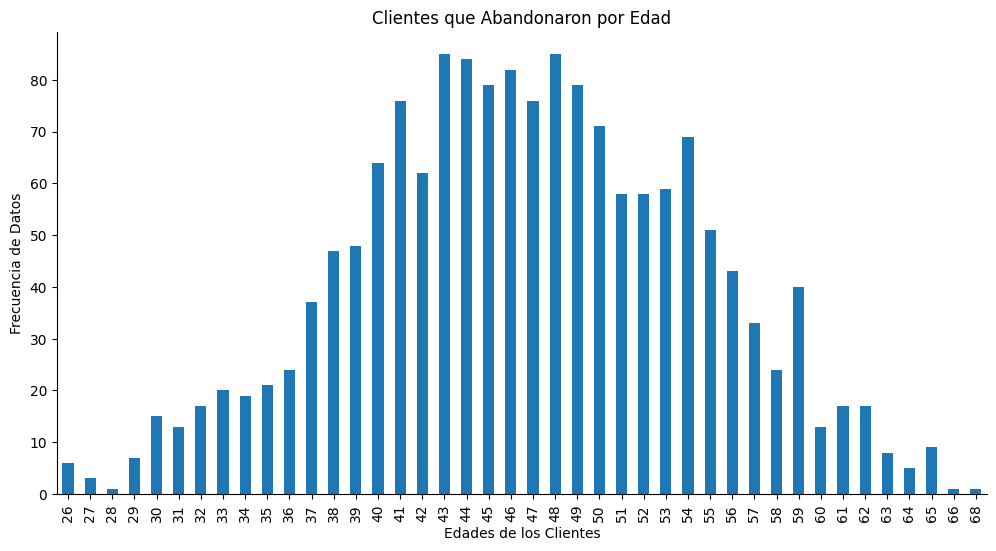

In [32]:
# Filtrar los datos para clientes que abandonaron
data = df[df['Attrition_Flag'] == 'Attrited Customer']['Customer_Age'].value_counts().sort_index()

# Crear un gráfico de barras Matplotlib
fig, ax = plt.subplots(figsize=(12, 6))  # Crear figura y ejes

# Graficar los datos
data.plot(kind='bar', ax=ax)

# Títulos y etiquetas
ax.set_title('Clientes que Abandonaron por Edad')
ax.set_xlabel('Edades de los Clientes')
ax.set_ylabel('Frecuencia de Datos')

# Ocultar los bordes derecho y superior
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Mostrar el gráfico
plt.show()



---



¿HAY ALGUNA DIFERENCIA SOBRESALIENTE EN EL GÉNERO QUE PUEDA ESTAR RELACIONADA A LA DESERCIÓN?

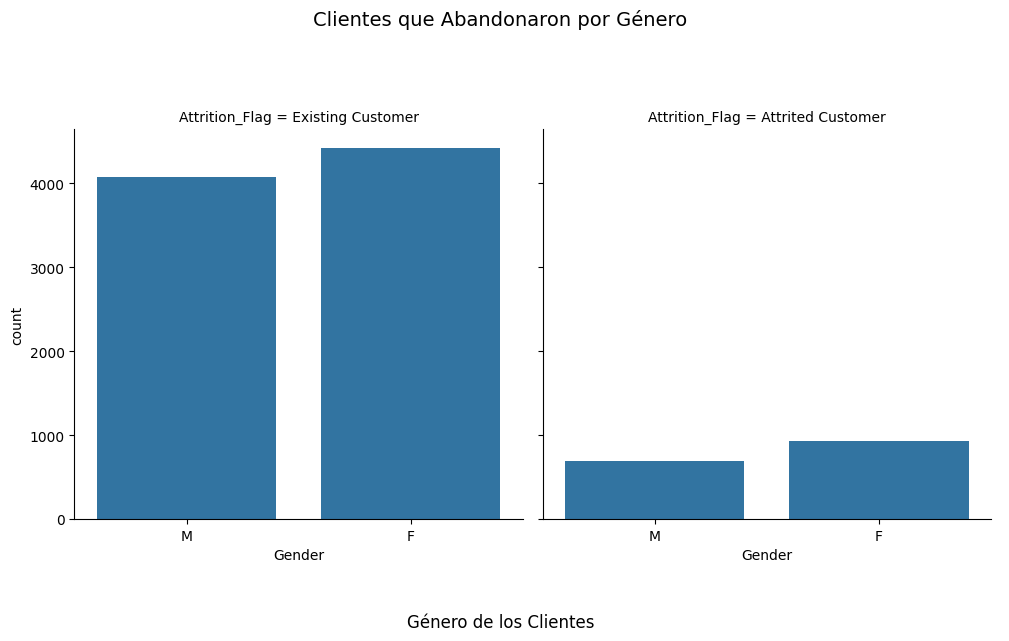

In [33]:
# Total de dimensiones deseadas
total_width, total_height = 10, 6
num_subplots = 2  # Categorías únicas en 'Attrition_Flag'

# Calcular la altura de cada subplot y la razón de proporción
subplot_height = total_height  # Se usa la altura total para cada subplot
aspect = (total_width / num_subplots) / subplot_height

# Se crea un catplot con la proporción y altura calculada
g = sns.catplot(x='Gender', col='Attrition_Flag', data=df,
                kind='count', height=subplot_height, aspect=aspect)

# Configurar Título superior
g.fig.suptitle('Clientes que Abandonaron por Género', fontsize=14, y=1.05)

# Ajustar x-label en posición y  apariencia
g.fig.text(0.5, 0.02, 'Género de los Clientes', ha='center', fontsize=12)

# Ajustar diseño de gráfico
plt.tight_layout()
plt.subplots_adjust(top=0.85, bottom=0.20)

plt.show()



---



¿CÓMO AFECTA EL NIVEL DE EDUCACIÓN DEL CLIENTE A LAS TASAS DE DESERCIÓN?

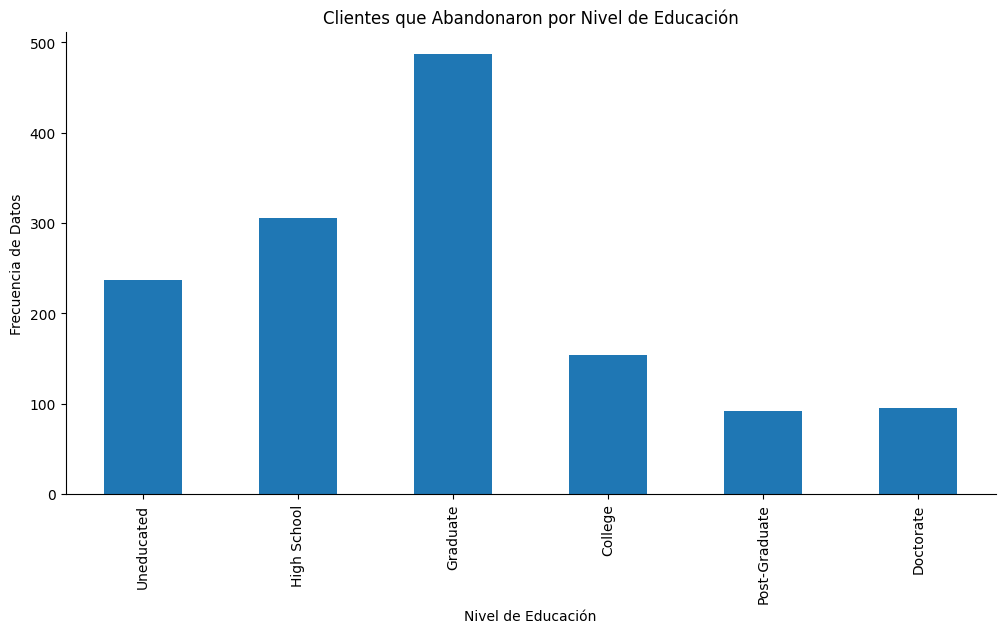

In [34]:
# Auto-definir el orden de las categorías de Educación
education_order = ["Uneducated", "High School", "Graduate", "College", "Post-Graduate", "Doctorate"]

# Contar cada categoría y reindexar según el orden definido
education_counts = df[df['Attrition_Flag'] == 'Attrited Customer']['Education_Level'].value_counts().reindex(education_order)

# Crear un gráfico de barras estilo Matplotlib
fig, ax = plt.subplots(figsize=(12, 6))  # Crear figura y ejes

# Graficar los datos
education_counts.plot(kind='bar', ax=ax)

# Títulos y etiquetas
ax.set_title('Clientes que Abandonaron por Nivel de Educación')
ax.set_xlabel('Nivel de Educación')
ax.set_ylabel('Frecuencia de Datos')

# Ajustar marco de la izquierda y superior en modo Invisible
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Mostrar el gráfico
plt.show()



---



¿AFECTA EL ESTADO CIVIL DEL CLIENTE A LAS TASAS DE DESERCIÓN?

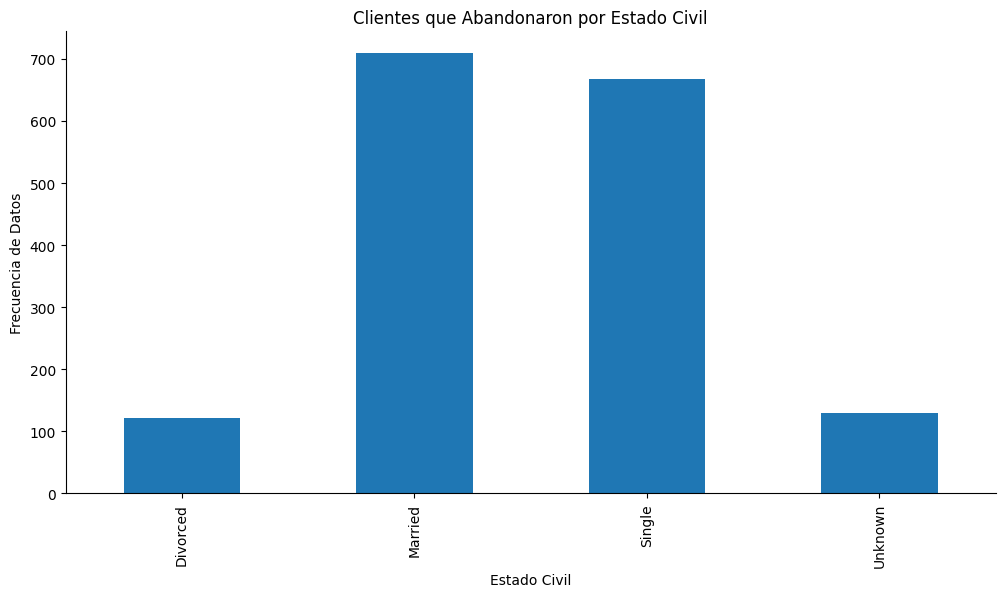

In [35]:
# Contar cada categoría de Marital_Status
e_civil_counts = df[df['Attrition_Flag'] == 'Attrited Customer']['Marital_Status'].value_counts().sort_index()

# Crear un gráfico de barras utilizando el estilo Matplotlib
fig, ax = plt.subplots(figsize=(12, 6))  # Crear figura y ejes

# Graficar los datos
e_civil_counts.plot(kind='bar', ax=ax)

# Títulos y etiquetas
ax.set_title('Clientes que Abandonaron por Estado Civil')
ax.set_xlabel('Estado Civil')
ax.set_ylabel('Frecuencia de Datos')

# Ajustar marco de la izquierda y superior en modo Invisible
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Mostar lo graficado
plt.show()



---



¿CÓMO AFECTA EL NIVEL DE INGRESOS DEL CLIENTE A LAS TASAS DE DESERCIÓN?

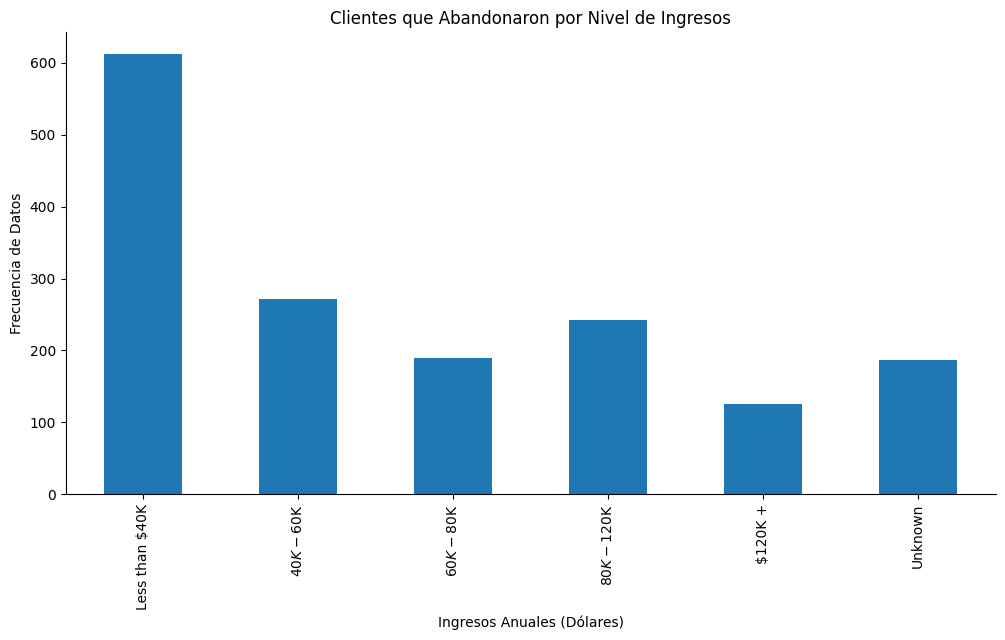

In [36]:
# Auto-definir el order de las categorías de Nivel de Ingresos
income_order = ["Less than $40K", "$40K - $60K", "$60K - $80K", "$80K - $120K", "$120K +","Unknown"]
# Contar los valores cliente desertó y por Ingresos
df[df['Attrition_Flag'] == 'Attrited Customer']['Income_Category'].value_counts()\
.reindex(income_order).plot.bar(figsize=(12,6))
plt.title('Clientes que Abandonaron por Nivel de Ingresos')
plt.xlabel('Ingresos Anuales (Dólares)')
plt.ylabel('Frecuencia de Datos')

# Ajustar marco de la izquierda y superior en modo Invisible
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.show()



---



## **ANÁLISIS BIVARIADO**

¿TIENE ALGUNA RELEVANCIA EL GÉNERO EN EL LÍMITE DE CRÉDITO?

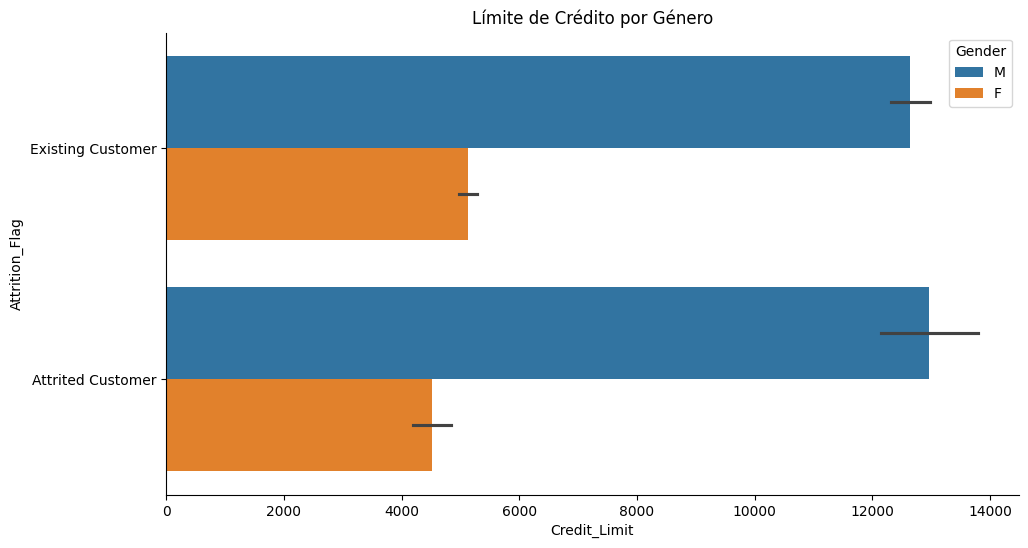

In [37]:
# Ajustar el tamaño del gráfico
plt.figure(figsize=(11,6))
# Ajustar eje x e y, la tonalidad será por Género en un Barplot Horizontal
sns.barplot(data=df, x='Credit_Limit',y=df['Attrition_Flag'], hue = 'Gender').set(title = 'Límite de Crédito por Género')

# Ajustar marco de la izquierda y superior en modo Invisible
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()



---



¿CÓMO ES LA DISTRIBUCIÓN EN LAS VARIABLES NUMÉRICAS?

In [38]:
# Seleccionar variables numéricas
numerical = [col for col in df.columns if df[col].dtypes != 'O']

numerical_8 = numerical[:8]
numerical_6 = numerical[8:]

In [39]:
# Dejando solo variables numéricas por Naturaleza
numerical_4 = ['Customer_Age',
 'Months_on_book',
 'Credit_Limit',
 'Total_Revolving_Bal']
numerical_4

['Customer_Age', 'Months_on_book', 'Credit_Limit', 'Total_Revolving_Bal']

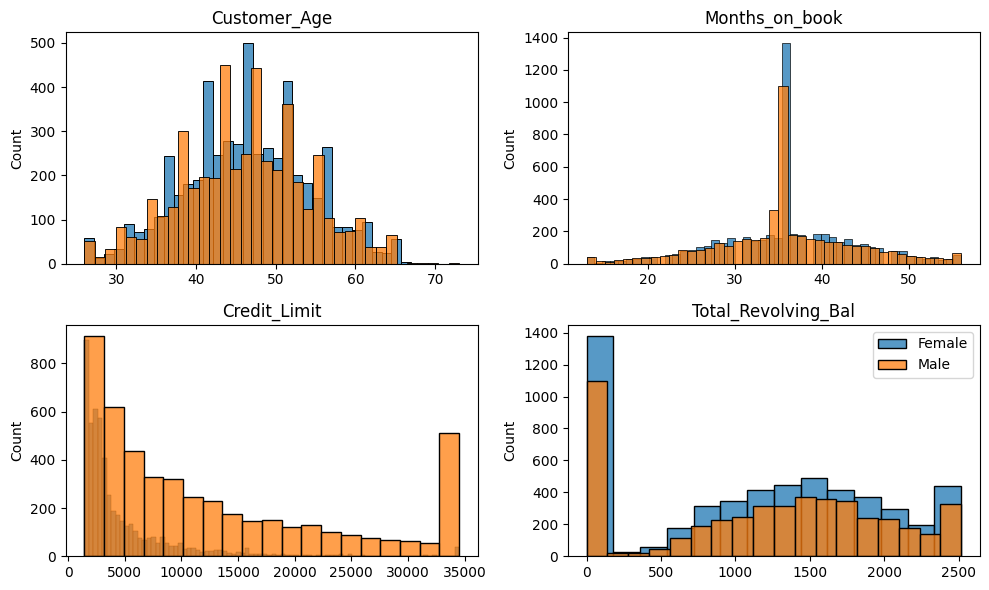

In [40]:
# Definir el número de columnas en la disposición de gráficos
columns = 2
fig, axes = plt.subplots(len(numerical_4) // columns + (len(numerical_4) % columns > 0), columns, figsize=(10,6))

F = df[df['Gender']=='F']
M = df[df['Gender']=='M']

for current_idx, variable in enumerate(numerical_4):
  i = current_idx // columns # Filas
  j = current_idx % columns # Columnas

  sns.histplot(F[variable],label= 'Female', ax=axes[i][j])
  sns.histplot(M[variable],label= 'Male', ax=axes[i][j])

  axes[i][j].set_title(variable)
  axes[i][j].set_xlabel("")

plt.tight_layout()
plt.legend()
plt.show()



---



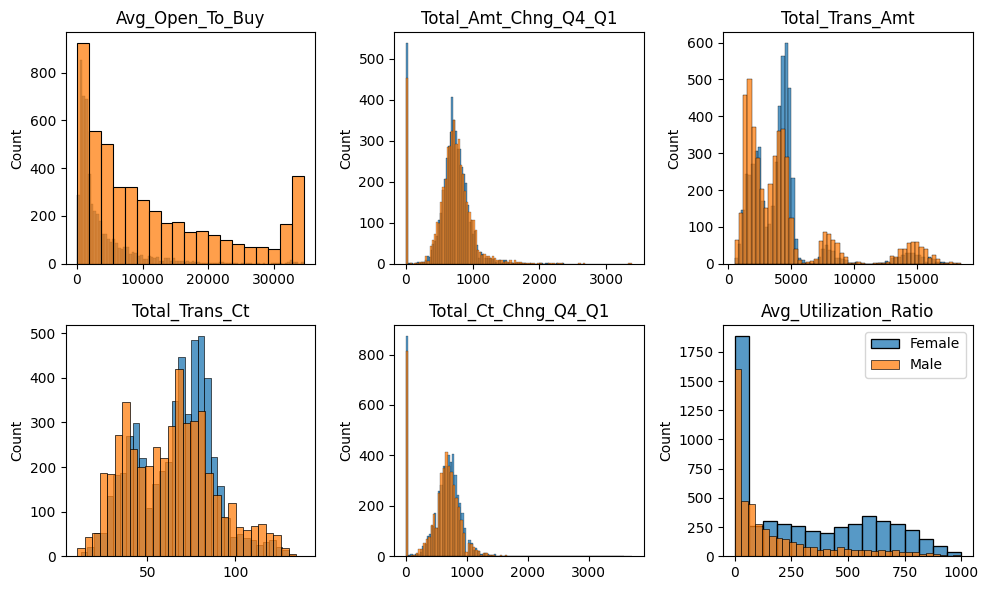

In [41]:
# Definir el número de columnas en la disposición de gráficos
columns = 3
fig, axes = plt.subplots(len(numerical_6) // columns + (len(numerical_6) % columns > 0), columns, figsize=(10,6))

F = df[df['Gender']=='F']
M = df[df['Gender']=='M']

for current_idx, variable in enumerate(numerical_6):
  i = current_idx // columns # Filas
  j = current_idx % columns # Columnas

  sns.histplot(F[variable],label= 'Female', ax=axes[i][j])
  sns.histplot(M[variable],label= 'Male', ax=axes[i][j])

  axes[i][j].set_title(variable)
  axes[i][j].set_xlabel("")

plt.tight_layout()
plt.legend()
plt.show()



---



¿CÓMO AFECTA TOTAL_TRANS_CT A LAS TASAS DE DESERCIÓN?

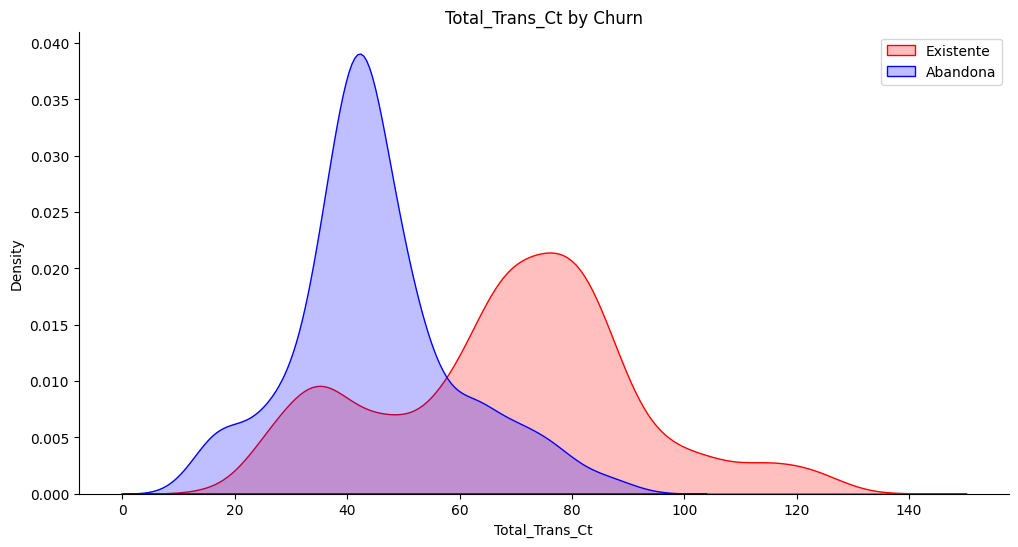

In [42]:
# Definir el tamaño de la figura
plt.figure(figsize=(12,6))
Amt = sns.kdeplot(df.Total_Trans_Ct[(df['Attrition_Flag']=='Existing Customer')], color = 'Red', fill=True)
Amt = sns.kdeplot(df.Total_Trans_Ct[(df['Attrition_Flag']=='Attrited Customer')],  color = 'Blue',fill=True)

Amt.legend(['Existente', 'Abandona'], loc='upper right')
Amt.set_ylabel('Density')
Amt.set_xlabel('Total_Trans_Ct')
Amt.set_title('Total_Trans_Ct by Churn')

# Ajustar marco de la izquierda y superior en modo Invisible
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()



---



¿CÓMO AFECTA TOTAL_TRANS_AMT A LAS TASAS DE DESERCIÓN?

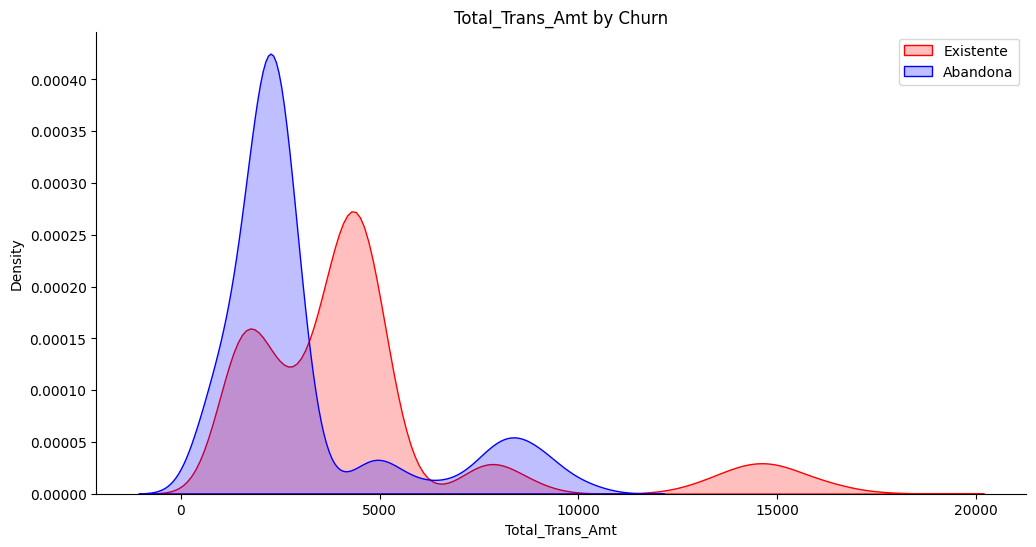

In [43]:
# Definir el tamaño de la figura
plt.figure(figsize=(12,6))
trans_amt = sns.kdeplot(df.Total_Trans_Amt[(df['Attrition_Flag']=='Existing Customer')], color = 'Red', fill=True)
trans_amt = sns.kdeplot(df.Total_Trans_Amt[(df['Attrition_Flag']=='Attrited Customer')],  color = 'Blue',fill=True)

trans_amt.legend(['Existente', 'Abandona'], loc='upper right')
trans_amt.set_ylabel('Density')
trans_amt.set_xlabel('Total_Trans_Amt')
trans_amt.set_title('Total_Trans_Amt by Churn')

# Ajustar marco de la izquierda y superior en modo Invisible
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()



---



¿CÓMO AFECTA CONTACTS_COUNT_12_MON A LAS TASAS DE DESERCIÓN?

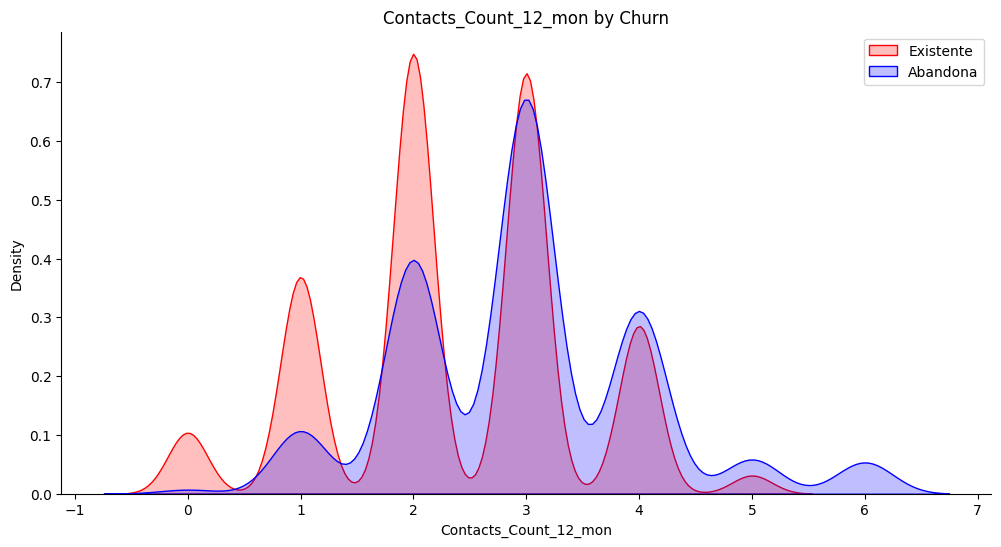

In [44]:
# Definir el tamaño de la figura
plt.figure(figsize=(12,6))
trans_amt = sns.kdeplot(df.Contacts_Count_12_mon[(df['Attrition_Flag']=='Existing Customer')], color = 'Red', fill=True)
trans_amt = sns.kdeplot(df.Contacts_Count_12_mon[(df['Attrition_Flag']=='Attrited Customer')],  color = 'Blue',fill=True)

trans_amt.legend(['Existente', 'Abandona'], loc='upper right')
trans_amt.set_ylabel('Density')
trans_amt.set_xlabel('Contacts_Count_12_mon')
trans_amt.set_title('Contacts_Count_12_mon by Churn')

# Ajustar marco de la izquierda y superior en modo Invisible
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()



---



ANÁLISIS DEL COMPORTAMIENTO INDIVIDUAL DE LAS VARIABLES NUMÉRICAS

In [45]:
# Crear Boxplot en Plotly
columns = 8
rows = len(numerical_8) // columns + (len(numerical_8) % columns > 0)

fig = make_subplots(rows=rows, cols=columns)

for i, variable in enumerate(numerical_8):
    row = i // columns + 1
    col = i % columns + 1
    fig.add_trace(go.Box(y=df[variable], x=df['Gender'], name=variable), row=row, col=col)

# Definir el Título
fig.update_layout(title_text="Análisis del Comportamiento Individual de las Variables Numéricas")
fig.show()

In [46]:
# Crear Boxplot en Plotly
columns = 6
rows = len(numerical_6) // columns + (len(numerical_6) % columns > 0)

fig = make_subplots(rows=rows, cols=columns)

for i, variable in enumerate(numerical_6):
    row = i // columns + 1
    col = i % columns + 1
    fig.add_trace(go.Box(y=df[variable], x=df['Gender'], name=variable), row=row, col=col)

# Definir el Título
fig.update_layout(title_text="Análisis del Comportamiento Individual de las Variables Numéricas")
fig.show()



---



# **ANÁLISIS MULTIVARIADO**

EXPLORANDO POSIBLES RELACIONES ENTRE VARIABLES CON PAIRPLOT

In [47]:
# Tomar un subconjunto de las características del Set de Datos
numerical_short = ['Contacts_Count_12_mon', 'Months_Inactive_12_mon','Customer_Age','Months_on_book','Credit_Limit','Attrition_Flag']

<Figure size 600x400 with 0 Axes>

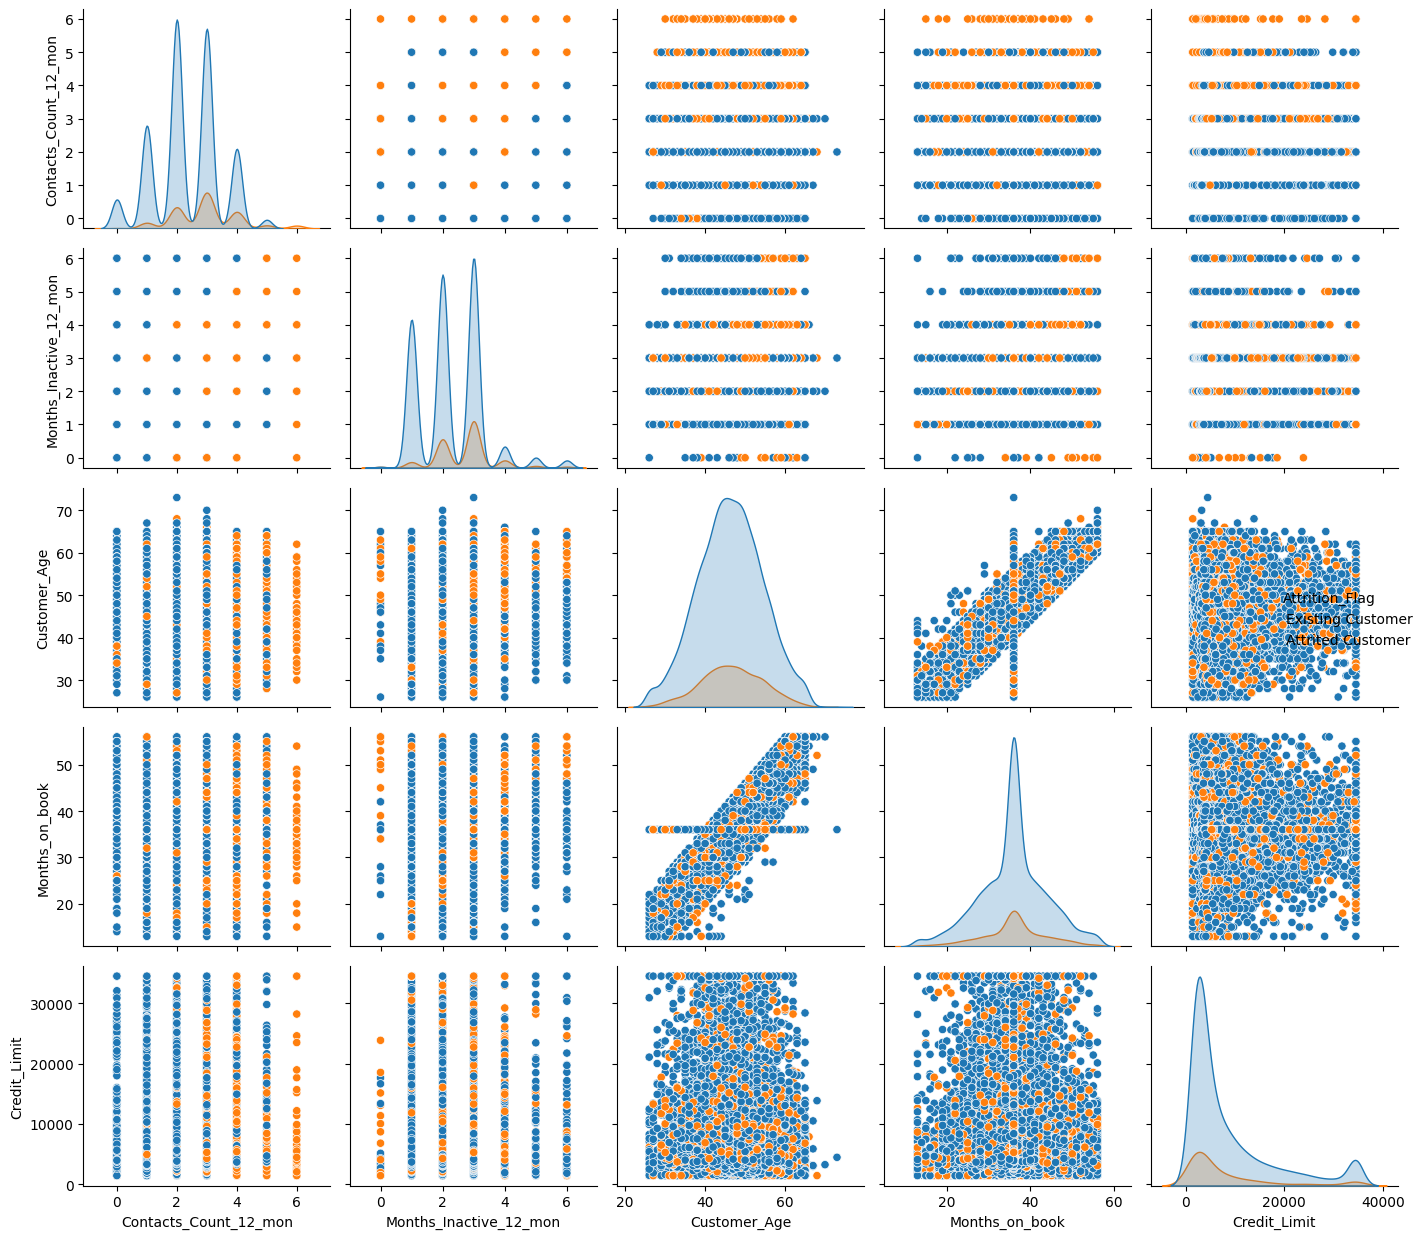

In [48]:
# Definir el tamaño de la figura
plt.figure(figsize=(6, 4))

columns_to_plot = numerical_short
# Convert the 'Attrition_Flag' column to a string type
sns.pairplot(df[columns_to_plot], hue='Attrition_Flag',
             hue_order=['Existing Customer', 'Attrited Customer'])
plt.tight_layout()
plt.show()

In [49]:
# Mapear Attrited_Customer con el valor "1" y la otra categoría con "0"
df['Attrition_Flag'].replace({'Existing Customer':0, 'Attrited Customer':1}, inplace=True)

In [50]:
# Ver correlación de 'Contacts_Count_12_mon' con 'Attrition_Flag'
df['Attrition_Flag'].corr(df['Contacts_Count_12_mon'])

0.20449050998160426



---



In [51]:
# Crear una copia del Dataframe original con otro nombre; evitar data leakage
df2 = df.copy()

In [52]:
#Identificar variables numéricas
numerico = [col for col in df2.columns if df2[col].dtypes != 'O']
numerico

['Attrition_Flag',
 'Customer_Age',
 'Dependent_count',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio']

In [53]:
#Identificar variables categóricas
categorico = [col for col in df2.columns if df2[col].dtypes == 'O']
categorico

['Gender',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category']

In [54]:
#Aplicar Encoding a las variables categóricas temporales
df2 = pd.get_dummies(df2)

GRAFICAR HEATMAP PARA VER CORRELACIONES

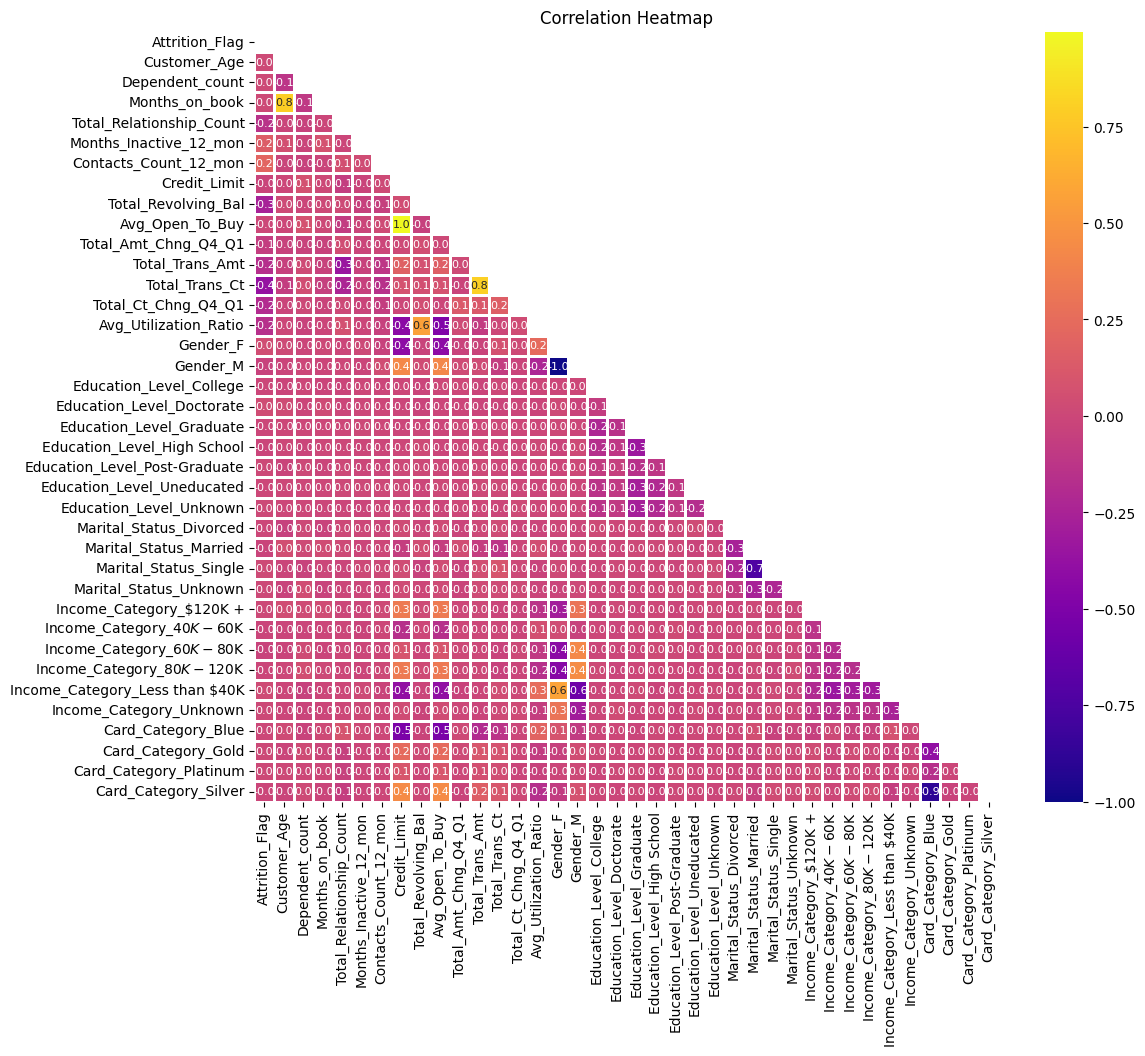

In [55]:
#Mapa de Calor que muestra la correlación entre variables

plt.figure(figsize= (12,10))
mask = np.triu(np.ones_like(df2.corr(),dtype = bool))
sns.heatmap(df2.corr(),mask = mask, fmt = ".1f",annot=True,lw=1,cmap = 'plasma', annot_kws={'size':8})
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.title('Correlation Heatmap')
plt.show()



---



GRAFICAR CORRELACIONES MÁS INFLUYENTES

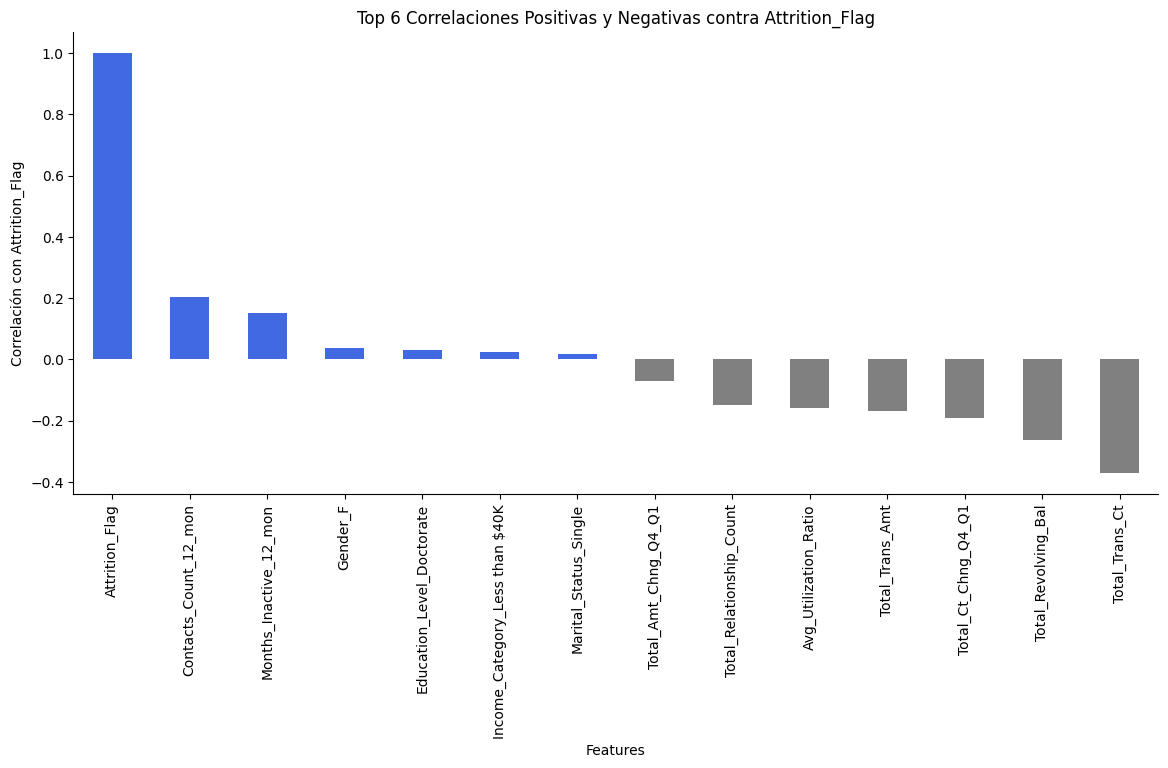

In [56]:
# Sort the correlation values in descending order
sorted_corr = df2.corr()['Attrition_Flag'].sort_values(ascending=False)

# Select the first 6 positive and last 6 negative features
top_positive_features = sorted_corr.head(7).index.tolist()
top_negative_features = sorted_corr.tail(7).index.tolist()
selected_features = top_positive_features + top_negative_features

# Filter the DataFrame to include only the selected features
selected_df = df2[selected_features]

# Create a color mapping
#colors = ['blue'] * len(top_positive_features) + ['gray'] * len(top_negative_features)
colors = ['#4169E1'] * len(top_positive_features) + ['gray'] * len(top_negative_features)

# Create a bar plot
plt.figure(figsize=(14, 6))
selected_df.corr()['Attrition_Flag'][selected_features].plot.bar(color=colors)

# Add labels and title
plt.xlabel('Features')
plt.ylabel('Correlación con Attrition_Flag')
plt.title('Top 6 Correlaciones Positivas y Negativas contra Attrition_Flag')

ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Display the plot
plt.show()




---



# PREPROCESAMIENTO

ELECIÓN DE VARIABLES: FEATURE ENGINEERING

In [57]:
# Revisar Columnas restantes
df.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [58]:
# Seleccionar Colmnas influyentes
quedar = ['Contacts_Count_12_mon', 'Months_Inactive_12_mon','Total_Revolving_Bal',
          'Total_Trans_Ct','Attrition_Flag','Gender','Marital_Status','Income_Category','Education_Level']

In [59]:
# Aplicar lo seleccionado en el DataFrame
df_prueba = df[quedar]
print(df_prueba.head())

   Contacts_Count_12_mon  Months_Inactive_12_mon  Total_Revolving_Bal  \
0                      3                       1                  777   
1                      2                       1                  864   
2                      0                       1                    0   
3                      1                       4                 2517   
4                      0                       1                    0   

   Total_Trans_Ct  Attrition_Flag Gender Marital_Status Income_Category  \
0              42               0      M        Married     $60K - $80K   
1              33               0      F         Single  Less than $40K   
2              20               0      M        Married    $80K - $120K   
3              20               0      F        Unknown  Less than $40K   
4              28               0      M        Married     $60K - $80K   

  Education_Level  
0     High School  
1        Graduate  
2        Graduate  
3     High School  
4      Une

In [60]:
# Eliminar variable Objetivo de la Matriz "X"
X = df_prueba.drop(labels='Attrition_Flag', axis=1)
# Seleccionar Variable Objetivo
y = df_prueba['Attrition_Flag']

DIVISIÓN SET DE ENTRENAMIENTO Y SET DE PRUEBA

In [61]:
# Definir para asegurar Reproducibilidad entre pares
SEED = 88

In [62]:
# Dividir los datos en Entrenamiento y Prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=SEED)

In [63]:
#Aplicando ENCODING sobre las variables categóricas que fueron elegidas
X_train = pd.get_dummies(X_train)
X_train = X_train.values.astype(float)#transformado en Numpy Array y FLOAT para mejor desempeño en Machine Learning
X_test = pd.get_dummies(X_test)
X_test = X_test.values.astype(float)#transformado en Numpy Array y FLOAT para mejor desempeño en Machine Learning

In [64]:
# Revisar qué tipos datos es ahora
type(X_train)

numpy.ndarray

In [65]:
# Revisar qué tipos datos es ahora
type(X_test)

numpy.ndarray

BALANCEANDO EL SET DE DATOS CON SMOTE

In [66]:
# Definir el algoritmo para Oversampling
method = SMOTE(random_state=SEED)

In [67]:
# Ajustando SMOTE
X_train_resampled, y_train_resampled = method.fit_resample(X_train, y_train)

In [68]:
# Comprobar que se hizo Oversampling
X_train_resampled.shape

(13598, 23)

In [69]:
# Comprobar que se hizo Oversampling
y_train_resampled.shape

(13598,)

In [70]:
# Definir Scaler y ajustarlo
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# ENTRENANDO MODELO DE MACHINE LEARNING

BÚSQUEDA DE MEJORES PARÁMETROS PARA XGBOOST

In [71]:
# Inicializar XGBoost
xgb = XGBClassifier()

DEFINIENDO PARÁMETROS PARA GRIDSEARCH_CV

In [72]:
# Definir parámetros de XGBoost para GridSearchCV
params_xgb = {'max_depth': [4,5], #Intenté con más parámetros pero traté de nivelar los resultados de Cross Validation
              'learning_rate': [0.0001 , 0.1],  #Intenté con más parámetros pero traté de nivelar los resultados de Cross Validation
              'colsample_bytree': [0.77, 0.88],  # Similar a subsample
              'colsample_bylevel': [0.7],
              'n_estimators': np.arange(100, 150, 10),  # XGBoost es más rápido ajustar de manera adecuada
              'gamma': [0, 0.1],
              'random_state': [SEED]}

In [73]:
# Iniciar GridSearchCV con los parámetros seleccionados
grid_xgb = GridSearchCV(estimator=xgb, param_grid=params_xgb, cv=5, scoring='f1', n_jobs=-1)

In [74]:
# Ajustar GridSearchCV en los set de Entrenamiento
grid_xgb.fit(X_train_scaled, y_train_resampled)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bylevel': [0.7],
                         'colsample_bytree': [0.77, 0.88], 'gamma': [0, 0.1],
                         'learning_rate': [0.0001, 0.1], 'max_depth': [4, 5],
                         'n_estimators': array([100, 110, 120, 130, 140]),
                         'random_state': [88]},
             scoring='f1')

In [75]:
# Guardar los mejores parámetros obtenidos en la variable creada
best_p = grid_xgb.best_params_

In [76]:
# Guardar el mejor puntaje con parámetros obtenidos en la variable creada
best_score = grid_xgb.best_score_

In [77]:
# Imprimir resultados
print(f'Best parameters: {best_p} and best score: {best_score}')

Best parameters: {'colsample_bylevel': 0.7, 'colsample_bytree': 0.77, 'gamma': 0, 'learning_rate': 0.0001, 'max_depth': 5, 'n_estimators': 140, 'random_state': 88} and best score: 0.9001898266764525


IMPLEMENTACIÓN DEL MODELO: XGBOOST CLASSIFIER

In [78]:
# Definir XGBoost con los siguientes Hiperparámetros
xgb = XGBClassifier(
    max_depth=5,
    learning_rate=0.0001,
    colsample_bytree=0.77,
    colsample_bylevel=0.7,
    n_estimators=140,
    gamma=0.1,
    random_state=SEED
)

In [79]:
# Ajustar XGBoost en los Sets de Entrenamiento
xgb.fit(X_train_scaled, y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.7, colsample_bynode=None,
              colsample_bytree=0.77, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.0001, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=140, n_jobs=None,
              num_parallel_tree=None, random_state=88, ...)

In [80]:
# Hacer predicciones en el Set de Prueba
y_pred = xgb.predict(X_test_scaled)

IMPRIMIENDO COMPARACIÓN DE PUNTAJES

In [81]:
# Imprimir Accuracy para el Set de Prueba
print(xgb.score(X_test_scaled, y_test))

0.8741362290227048


In [82]:
# Calcular probabilidades de ambas clases en variable Objetivo
y_proba = xgb.predict_proba(X_test_scaled)

IMPRESIÓN DE ROC AUC: VALOR DE PREDICCIÓN CLASE "1" DE LA VARIABLE OBJETIVO

In [83]:
# Imprimiendo el resultado de Predecir las variable Attrited como Verdadera
auc = roc_auc_score(y_test, y_proba[:, 1])
print(f'Puntaje AUC: {auc}')

Puntaje AUC: 0.9180029846696514


REPORTE DE CLASIFICACIÓN

In [84]:
# Imprimir Reporte de Clasificación
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92      1701
           1       0.59      0.72      0.65       325

    accuracy                           0.87      2026
   macro avg       0.77      0.81      0.79      2026
weighted avg       0.89      0.87      0.88      2026



APLICANDO STRATIFIED K-FOLD CROSS VALIDATION SOBRE XGBOOST CLASSIFIER

In [85]:
# Obtener una estimación Robusta del desempeño del Modelo de Machine Learning
MSE_CV = cross_val_score(xgb, X_train_scaled, y_train_resampled,
                         cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED), scoring='neg_mean_squared_error', n_jobs=-1)

In [86]:
# Obtener promedio de MSE a través de múltiples Folds en la Validación Cruzada
print("CV MSE: {:.2f}".format(MSE_CV.mean()*-1))

CV MSE: 0.09


In [87]:
# Obtener cuán bien el modelo se ajusta a los datos de Entrenamiento
print("Train MSE: {:.2f}".format(MSE(y_train_resampled, xgb.predict(X_train_scaled))))

Train MSE: 0.09


In [88]:
# Obtener cuán bien el modelo generaliza en datos que no ha visto; Set de Prueba
print("Test MSE: {:.2f}".format(MSE(y_test, y_pred)))

Test MSE: 0.13
